# Evaluating Clusters

# Q.1


Get the silhoutte coefficient of the two cluster k-means solution. You'll notice that the silhoutte coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that the silhoutte score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import adjusted_rand_score


In [3]:
iris_data=pd.read_csv("iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# K=2

In [12]:
X_i = iris_data.iloc[:, 1:5].values

In [13]:
kmeans_i = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_i = kmeans_i.fit_predict(X_i)

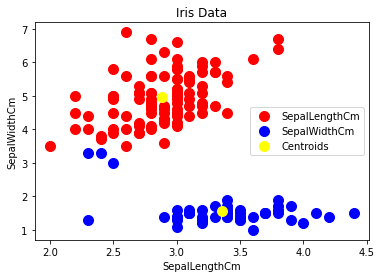

In [14]:
#Visualising the clusters
plt.scatter(X_i[y_kmeans_i == 0, 1], X_i[y_kmeans_i == 0, 2], s = 100, c = 'red', label = 'SepalLengthCm')
plt.scatter(X_i[y_kmeans_i == 1, 1], X_i[y_kmeans_i == 1, 2], s = 100, c = 'blue', label = 'SepalWidthCm')

plt.title('Iris Data')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')




#Plotting the centroids of the clusters
plt.scatter(kmeans_i.cluster_centers_[:, 1], kmeans_i.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Silhouette Score

In [7]:
print(metrics.silhouette_score(X_i,  y_kmeans_i, metric='euclidean'))

0.6808136202936816


# K=3

In [8]:
kmeans_ii = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_ii = kmeans_ii.fit_predict(X_i)

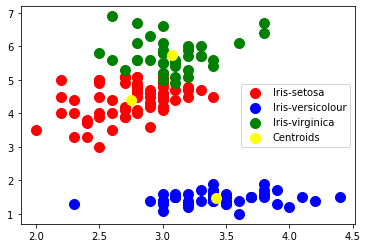

In [9]:
#Visualising the clusters
plt.scatter(X_i[y_kmeans_ii == 0, 1], X_i[y_kmeans_ii == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_i[y_kmeans_ii == 1, 1], X_i[y_kmeans_ii == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_i[y_kmeans_ii == 2, 1], X_i[y_kmeans_ii == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')



#Plotting the centroids of the clusters
plt.scatter(kmeans_ii.cluster_centers_[:, 1], kmeans_ii.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Silhouette Score

In [10]:
print(metrics.silhouette_score(X_i,  y_kmeans_ii, metric='euclidean'))

0.5525919445499757


Silhouette Score:  K2 > K3


The range of Silhouette score is [-1,1].


+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

# Q.2.i


In this assignment, you work with the heart disease data which you worked in the assignment of the previous checkpoint. 

i. Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one? 


In [15]:
heart_df=pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X_h = heart_df.iloc[:, :13].values

### K=2

In [17]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_h = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_h = kmeans_h.fit_predict(X_h)

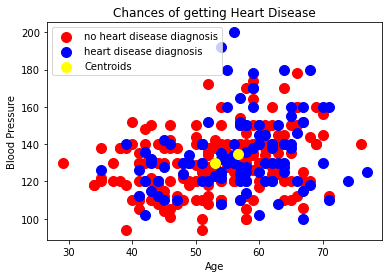

In [18]:
#Visualising the clusters
plt.scatter(X_h[y_kmeans_h == 0, 0], X_h[y_kmeans_h == 0, 3], s = 100, c = 'red', label = 'no heart disease diagnosis')
plt.scatter(X_h[y_kmeans_h == 1, 0], X_h[y_kmeans_h == 1, 3], s = 100, c = 'blue', label = 'heart disease diagnosis')

plt.title('Chances of getting Heart Disease')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')




#Plotting the centroids of the clusters
plt.scatter(kmeans_h.cluster_centers_[:, 0], kmeans_h.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### K=3

In [20]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_hh = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_hh = kmeans_hh.fit_predict(X_h)

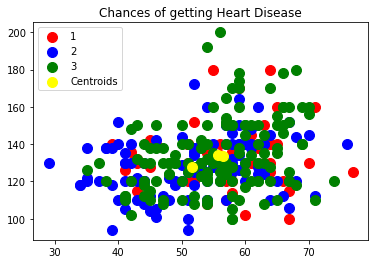

In [25]:
#Visualising the clusters
plt.scatter(X_h[y_kmeans_hh == 0, 0], X_h[y_kmeans_hh == 0, 3], s = 100, c = 'red', label = '1')
plt.scatter(X_h[y_kmeans_hh == 1, 0], X_h[y_kmeans_hh == 1, 3], s = 100, c = 'blue', label = '2')
plt.scatter(X_h[y_kmeans_hh == 2, 0], X_h[y_kmeans_hh == 2, 3], s = 100, c = 'green', label = '3')

plt.title('Chances of getting Heart Disease')




#Plotting the centroids of the clusters
plt.scatter(kmeans_hh.cluster_centers_[:, 0], kmeans_hh.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### K=4

In [27]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_hhh = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_hhh = kmeans_hhh.fit_predict(X_h)

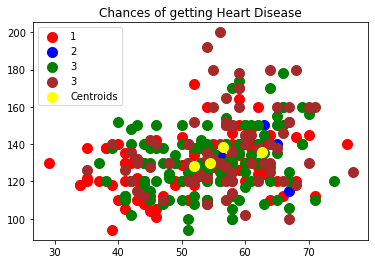

In [28]:
#Visualising the clusters
plt.scatter(X_h[y_kmeans_hhh == 0, 0], X_h[y_kmeans_hhh == 0, 3], s = 100, c = 'red', label = '1')
plt.scatter(X_h[y_kmeans_hhh == 1, 0], X_h[y_kmeans_hhh == 1, 3], s = 100, c = 'blue', label = '2')
plt.scatter(X_h[y_kmeans_hhh == 2, 0], X_h[y_kmeans_hhh == 2, 3], s = 100, c = 'green', label = '3')
plt.scatter(X_h[y_kmeans_hhh == 3, 0], X_h[y_kmeans_hhh == 3, 3], s = 100, c = 'brown', label = '3')

plt.title('Chances of getting Heart Disease')




#Plotting the centroids of the clusters
plt.scatter(kmeans_hhh.cluster_centers_[:, 0], kmeans_hhh.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

K=2 is clear than another K values

# Q.2.ii

In [ ]:
ii. Get ARI scores for each of the previous solutions. Which model is the best?

### K=2

In [41]:
score_ = adjusted_rand_score(labels_true=heart_df['target'], 
                            labels_pred=kmeans_h.labels_)
score_

0.020501037065411676

In [37]:
y_h = heart_df.iloc[:, 13].values

In [40]:
score=metrics.adjusted_rand_score(y_h, y_kmeans_h)
score

0.020501037065411676

### K=3

In [43]:
score_h=metrics.adjusted_rand_score(y_h, y_kmeans_hh)
score_h

0.008492720982724496

### K=4

In [44]:
score_hh=metrics.adjusted_rand_score(y_h, y_kmeans_hhh)
score_hh

0.013824123110854685

The best ARI score is K=2

# Q.2.iii

iii. Get silhoutte coefficients for each of the previous solutions. Which model is the best?

### K=2

In [45]:
print(metrics.silhouette_score(X_h,  y_kmeans_h, metric='euclidean'))

0.3894111733870929


### K=3

In [46]:
print(metrics.silhouette_score(X_h,  y_kmeans_hh, metric='euclidean'))

0.2877647413673084


### K=4

In [47]:
print(metrics.silhouette_score(X_h,  y_kmeans_hhh, metric='euclidean'))

0.28060645631083486
